In [57]:
import numpy as np
import matplotlib.pyplot as gr
import sympy as sm 


In [58]:
def Clasificador(jacMat):
    t = jacMat.trace()
    d = jacMat.det()
    F = t**2 - 4*d
    eig_values = list(jacMat.eigenvals())
    k = len(eig_values)
    print(k)
    for i in range(k):
        eig_values[i] = complex(eig_values[i])
    
        aR = eig_values[i].real
        aC = eig_values[i].imag #Aqui nos referimos a la parte imaginaria 
        if k == 2: 
            bR = eig_values[i].real
            bC = eig_values[i].imag
        else:
            bR = 0
            bC = 0
        if aC == 0 and bC == 0: 
#Aqui estamos diciendo que los eigenvalores son reales 
            print("Los eigenvalores son reales")
            if aR >= 0 and bR < 0:
                print("estamos en un Saddle node ")
                if t < 0: 
                    print("es un punto atractor")
                elif t > 0: 
                    print("es un punto repulsor ")
            elif aR > 0 and bR <= 0:
                print("estamos en un Saddle node ")
                if t < 0: 
                    print("es un punto atractor")
                elif t > 0: 
                    print("es un punto repulsor ")
            elif aR <= 0 and bR > 0:
                print("estamos en un Saddle node")
                if t < 0: 
                    print("es un punto atractor")
                elif t > 0: 
                    print("es un punto repulsor ")
            
            elif aR <= 0 and bR < 0:
                print("Estamos en un Nodo")
                if t < 0: 
                    print("es un punto atractor")
                elif t > 0: 
                    print("es un punto repulsor ")
            elif aR < 0 and bR <= 0:
                print("Estamos en un Nodo")
                if t < 0: 
                    print("es un punto atractor")
                elif t > 0: 
                    print("es un punto repulsor ")
            elif aR >= 0 and bR > 0:
                print("Estamos en un Nodo")
                if t < 0: 
                    print("es un punto atractor")
                elif t > 0: 
                    print("es un punto repulsor ")
        
            elif aR == bR and aR != 0: 
                print("Estamos en un nodo degenerado o en una estrella")
                if t < 0: 
                    print("es un punto atractor")
                elif t > 0: 
                    print("es un punto repulsor ")
        
            elif d == 0: 
                if t != 0: 
                    print("Estamos en una línea de puntos fijos")
                    if t < 0: 
                        print("es un punto atractor")
                    elif t > 0: 
                        print("es un punto repulsor ")
                elif t == 0: 
                    print("Estamos en un plano de puntos fijos")
                    if t < 0: 
                        print("es un punto atractor")
                    elif t > 0: 
                        print("es un punto repulsor ")
                    elif t == 0: 
                        print("Estamos en un plano de puntos fijos")

        elif aR == 0 and bR == 0 : #Aqui estamos diciendo que los eigenvalores son puramente complejos 
            print("Los eigenvalores son puramente complejos")
            print("Estamos en un centro")
        
        elif aR != 0 and bR != 0 and aC != 0 and bC != 0: #Aqui estamos diciendo que no son puramente reales o complejos, por lo que tienen las dos partes 
            print("Los eigenvalores son complejos (tienen parte real y compleja)")
            print("Estamos en una espiral (o tambien conocido como foco)")
            if aR < 0: 
                print("la espiral (o tambien conocido como foco) está decayendo")
                if t < 0: 
                    print("es un punto atractor")
                elif t > 0: 
                    print("es un punto repulsor ")
            if aR > 0: 
                print("la espiral (o tambien conocido como foco) está creciendo")
                if t < 0: 
                    print("es un punto atractor")
                elif t > 0: 
                    print("es un punto repulsor ")
    

In [59]:
def RK4vec(ic,f,pars):
    t = np.arange(pars["t_i"],pars["t_f"],pars["h"])
    U = np.zeros((len(t),len(ic)))
    U[0] = ic
    for i in range(1,len(t)):
        k1 = f(U[i-1])*pars["h"]
        k2 = f(U[i-1]+k1/2)*pars["h"]
        k3 = f(U[i-1]+k2/2)*pars["h"]
        k4 = f(U[i-1]+k3)*pars["h"]
        U[i] = U[i-1]+(k1+2*k2+2*k3+k4)/6
    return U.transpose()

In [60]:
Val = {"a":1, "p":1, "R":1,"w":1, "s":1, "d" :1, "t_i":0.0,"t_f":100,"h":0.05}
#aqui IC son las condiciones iniciales, se verán 4 distintas soluciones
#una en cada cuadrante
ic = ([5,-3],[-7,7], [-3,3])
n = len(ic)

def cancer(U):
    Y,I = U
    dY= Val["a"]*Val["p"]*Val["R"]-Val["w"]*Y
    dI= Val["s"]*Y - Val["d"]*I 
    return np.array([dY,dI])

#Definimos las ecuaciones del sistema: 
Y,I= sm.symbols("Y,I", ngative= False)
dY= Val["a"]*Val["p"]*Val["R"]-Val["w"]*Y
dI= Val["s"]*Y - Val["d"]*I 

In [61]:
eqMat = sm.Matrix([dY,dI])
eqMat

Matrix([
[ 1 - Y],
[-I + Y]])

In [62]:
Mat = sm.Matrix([Y,I])
Mat

Matrix([
[Y],
[I]])

In [63]:
jacMat = eqMat.jacobian(Mat)
jacMat

Matrix([
[-1,  0],
[ 1, -1]])

In [64]:
YEqual = sm.Eq(dY,0)
IEqual = sm.Eq(dI,0)

In [65]:
equilibrio = list(sm.solve((YEqual, IEqual), Y, I).values())
print(equilibrio)

[1, 1]


In [66]:
z = len(equilibrio)
z

2

In [67]:
eig_values=list(jacMat.eigenvals())
eig_values


[-1]

In [68]:
Clasificador(jacMat)

1
Los eigenvalores son reales
Estamos en un Nodo
es un punto atractor


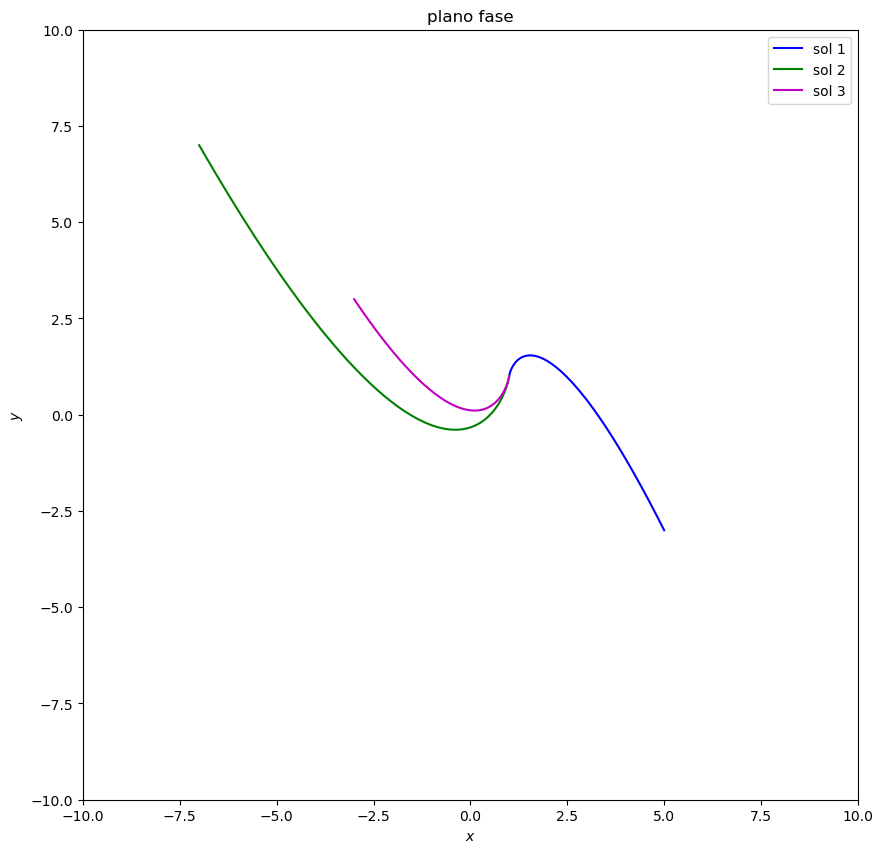

In [75]:
x1,y1 = RK4vec([5,-3],cancer,Val)
x2,y2 = RK4vec([-7,7],cancer,Val)
x3,y3 = RK4vec([-3,3],cancer,Val)


gr.figure(figsize = (10,10))
gr.plot(x1,y1,'b',label='sol 1')
gr.plot(x2,y2,'g',label = 'sol 2')
gr.plot(x3,y3,'m',label = 'sol 3')
gr.title("plano fase")
gr.xlabel("$x$")
gr.ylabel("$y$")
gr.xlim(-10,10)
gr.ylim(-10,10)
gr.legend()
gr.show()

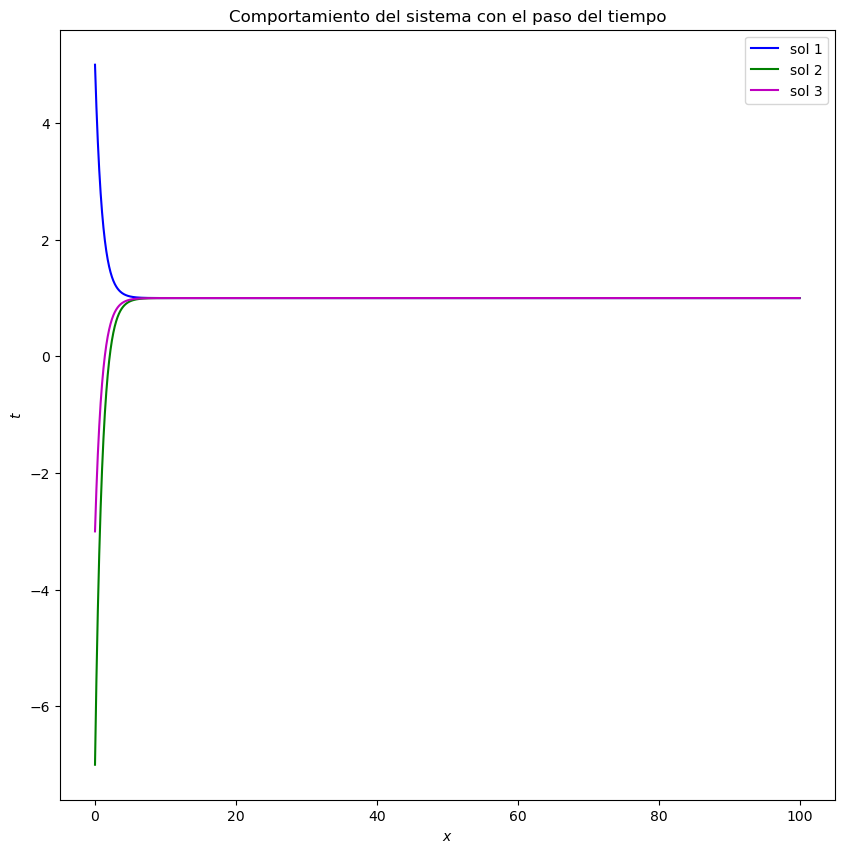

In [76]:
gr.figure(figsize = (10,10))
t = np.arange(Val["t_i"],Val["t_f"],Val['h'])
gr.plot(t,x1,'b',label='sol 1',  linewidth=1.5)
gr.plot(t,x2,'g',label = 'sol 2',linewidth=1.5)
gr.plot(t,x3,'m',label = 'sol 3',linewidth=1.5)
gr.title("Comportamiento del sistema con el paso del tiempo")
gr.xlabel("$x$")
gr.ylabel("$t$")
gr.legend()
gr.show()

In [77]:
def yNull(I):
    yy = Val["a"]*Val["p"]*Val["R"]/Val["w"]
    return yy

def iNull(Y):
    ii = (Val["s"]/Val["d"])
    return cc

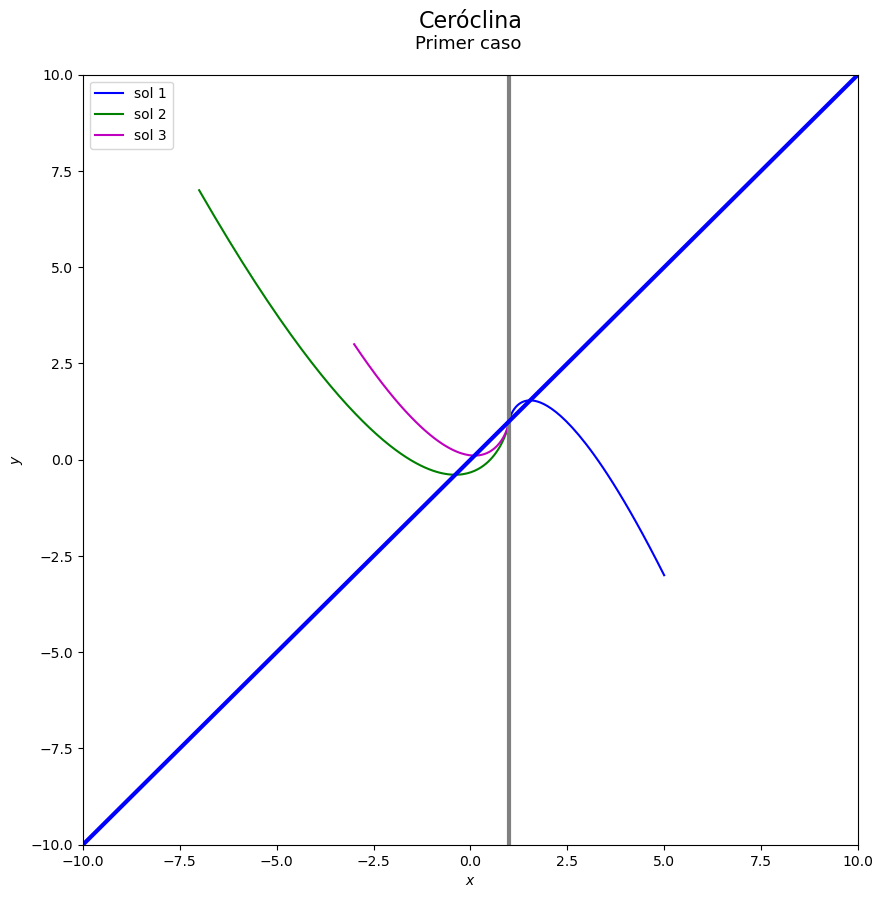

In [78]:
xdata = np.arange(-10,20,10)
ydata = [_*(Val["s"]/Val["d"]) for _ in xdata]
gr.figure(figsize = (10,10))
gr.plot(x1,y1,'b',label='sol 1')
gr.plot(x2,y2,'g',label = 'sol 2')
gr.plot(x3,y3,'m',label = 'sol 3')

gr.axvline(x=yNull(I), ymin=-0.1, ymax=1, color='gray', linewidth=3)
gr.plot(xdata, ydata, 'b',linewidth=3)

gr.suptitle("Primer caso",y=0.92,x=0.51, fontsize=13)

gr.title("Ceróclina", y=1.05, fontsize=16)
gr.xlabel("$x$")
gr.ylabel("$y$")
gr.xlim(-10,10)
gr.ylim(-10,10)
gr.legend()
gr.show()

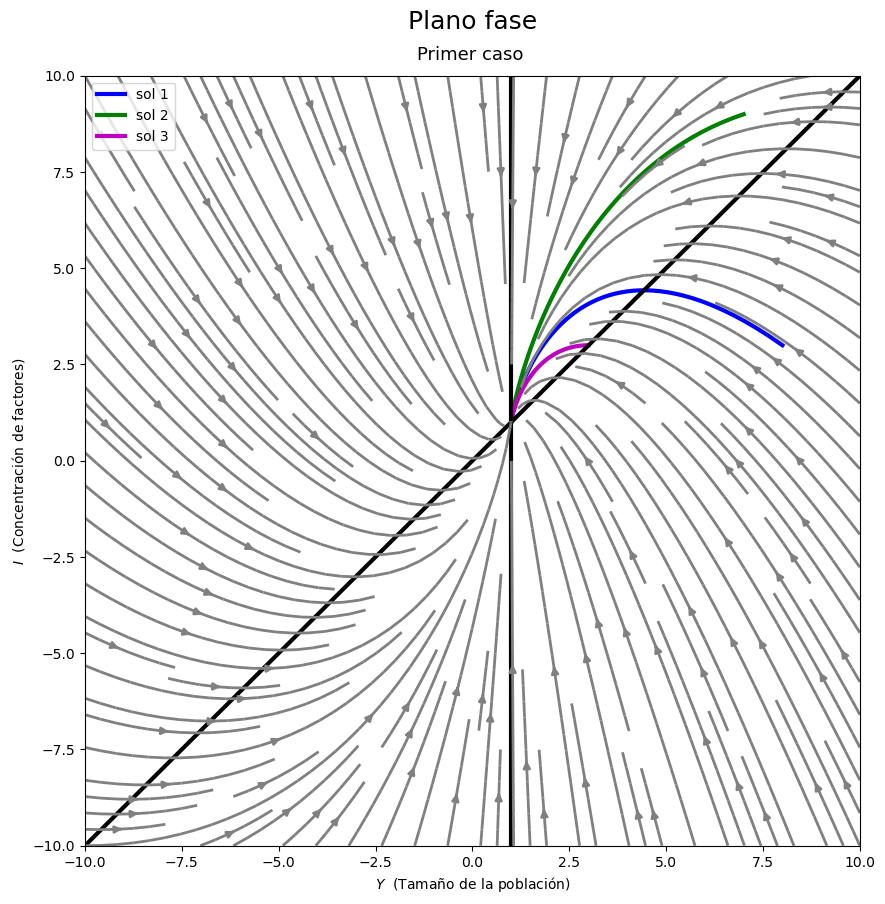

In [79]:
Val["a"] = 1
Val["p"] = 1
Val["R"] = 1
Val["w"] = 1
Val["s"] = 1
Val["d"] = 1
I, Y = np.mgrid[-10:10:100j, -10:10:100j]

dY= Val["a"]*Val["p"]*Val["R"]-Val["w"]*Y
dI= Val["s"]*Y - Val["d"]*I 


x1,y1 = RK4vec([8,3],cancer,Val)
x2,y2 = RK4vec([7,9],cancer,Val)
x3,y3 = RK4vec([3,3],cancer,Val)

xdata = np.arange(-10,20,10)
ydata = [_*(Val["s"]/Val["d"]) for _ in xdata]


gr.figure(figsize = (10,10))
gr.plot(x1,y1,'b',label='sol 1',  linewidth=3)
gr.plot(x2,y2,'g',label = 'sol 2',linewidth=3)
gr.plot(x3,y3,'m',label = 'sol 3',linewidth=3)

gr.axvline(x=yNull(I), ymin=-0.1, ymax=1, color='black', linewidth=3)
gr.plot(xdata, ydata, 'black', linewidth=3)

gr.streamplot(
    Y, I, dY, dI, color="gray", linewidth=2,  density=1.6)

gr.title("Plano fase", y=1.05,x=0.5, fontsize=18)
gr.suptitle("Primer caso",y=0.91,x=0.51, fontsize=13)
gr.xlabel("$Y$  (Tamaño de la población)")
gr.ylabel("$I$  (Concentración de factores)")
gr.xlim(-10,10)
gr.ylim(-10,10)
gr.savefig("PFS1_1.jpg")
gr.legend()
gr.show()